In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('./Downloads/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable: Definition
survival: Survival
pclass: Ticket class
sex: Sex
Age: Age in years
sibsp: # of siblings / spouses aboard the Titanic
parch: # of parents / children aboard the Titanic
ticket: Ticket number
fare: Passenger fare
cabin: Cabin number
embarked: Port of Embarkation

# Who were the passengers on the Titanic?

In [37]:
len(df)

891

891 passengers

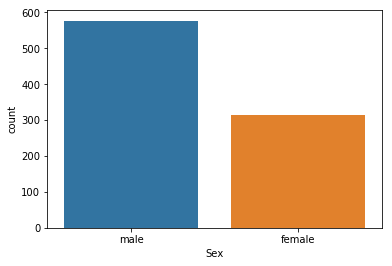

In [26]:
sns.countplot(data=df,x='Sex')

more males than females

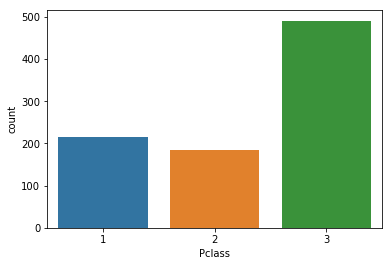

In [32]:
sns.countplot(data=df,x='Pclass')

most of the people are in the 3rd class, similar amount of people in 1st and 2nd classes

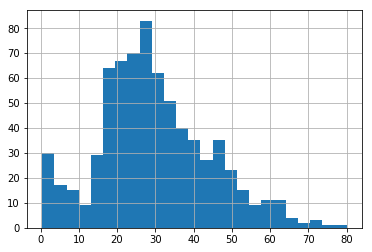

In [45]:
df['Age'].hist(bins=25)

a bimodal distribution: small population of children - under 12, and a poison like population of adults, mode at 20-30.

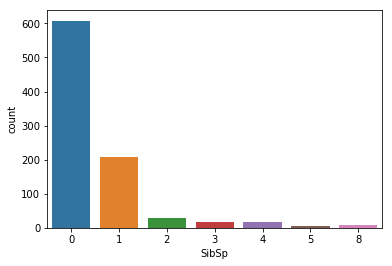

In [47]:
sns.countplot(data=df,x='SibSp')

most of the people had no siblings/spouses on board with them, ~20% had 1, the rest look negligeble. 

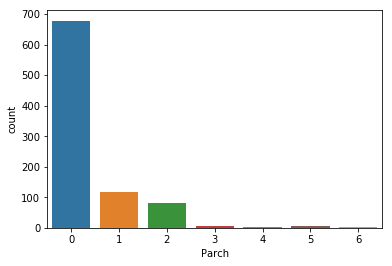

In [48]:
sns.countplot(data=df,x='Parch')

most people had no parents or children ob board. There are also 2 groups of 1 and 2 parents or children.

-> Now let's look how these parameters look toghether:

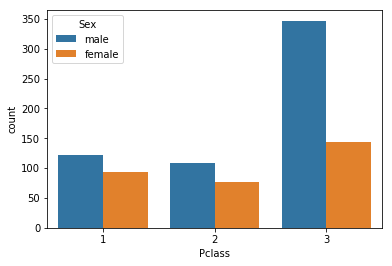

In [27]:
sns.countplot(data=df,x='Pclass',hue='Sex')

In classes 1,2 the amount of males and females is smilimar, while in the 3rd class females are less than half of the males.

In [49]:
df['child'] = df['Age'].apply(lambda x: x<=12)

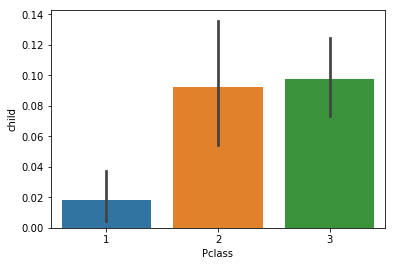

In [58]:
sns.barplot(data=df,x='Pclass',y='child')

similar % of children in 2nd and 3rd classes, while much smaller percent in 1st class.

* i guess that most children had parents with them, lets check it:

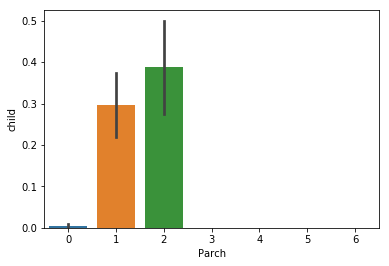

In [66]:
sns.barplot(data=df,x='Parch',y='child')

the assumption was correct - there are 2 major populations of children - with 1 parent or both. 

the assumption was correct - there are 2 major populations of children - with 1 parent or both. 
I wonder wether it depends on the sex of the child...

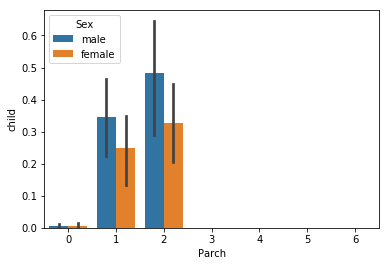

In [67]:
sns.barplot(data=df,x='Parch',y='child',hue='Sex')

The sex of the child doesn't seem to effect wehter he/she has both parents traveling with him/her. 
I wonder whether younger children were more likely to have both of their parrents with them.

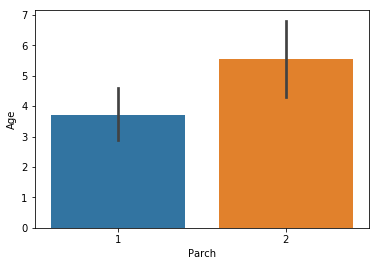

In [72]:
child_df = df[(df.child == 1)&(df.Parch!=0)] 
sns.barplot(data=child_df,x='Parch',y='Age')

No, my assumption seems to be wrong. At least the mean age of the children who had both their parents with them is higher. OK, let's leave this children-parents subject for now, though we can continue exploring it - it might depend on nuber of sibling, platform class etc.  

-> now let's explore the age distibutions between males and females

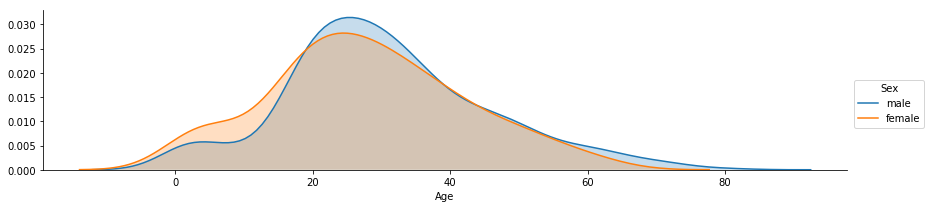

In [82]:
fig = sns.FacetGrid(df, hue="Sex",aspect=4) 
fig.map(sns.kdeplot,'Age',shade= True)
fig.add_legend()

we see that the trends of age are similar between men and women.

let's look at the distribution of ages between platforms.

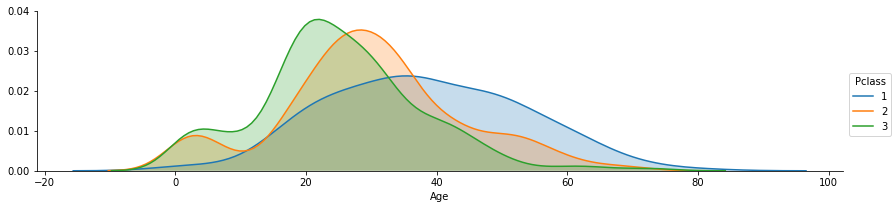

In [104]:
fig = sns.FacetGrid(df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(ylim=(0,0.04))
fig.add_legend()

We see that on the 1st platform the distribution is normal around 40. 
Most of the young (20-30) and almost all the children are on the 2nd and 3rd pltforms.
On the 2nd platforn there are 3 groups: children, adults (around 30) and older (around 55)
On the 3rd platfrom the same 3 groups, but the ages are lower: 20 and 40. 
it is important to remember that this is a normalised plot - and that most passengers are from the 3rd class.


# Spatial arrangment of the Cabins

In [119]:
df['Deck'] = df['Cabin'].str[0]
df['Room_num'] = df['Cabin'].str[1:]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,child,Deck,Room_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,NaN,NaN


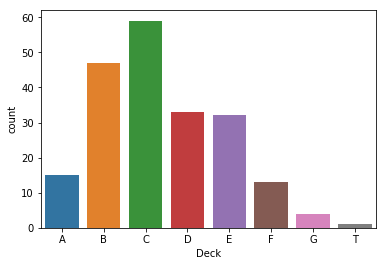

In [125]:
sns.countplot(x='Deck',data=df,order=['A','B','C','D','E','F','G','T'])

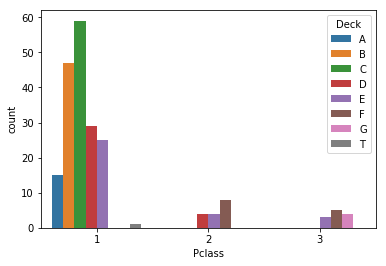

In [132]:
sns.countplot(data=df,x='Pclass',hue='Deck',hue_order=['A','B','C','D','E','F','G','T'])

We see that 1st class occupied decks A-E, 2nd class occupied decks D-F and 3rd class occupied decks E-G. 
However only very few passengers from 2nd and 3rd classes have known platforms - most are NaNs. 
So I think this parameter will be relevant only for the passengers from the 1st class.

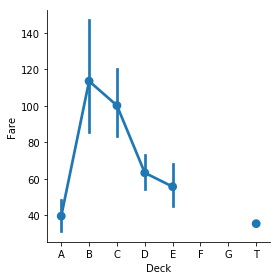

In [136]:
p1_df = df[(df.Pclass==1)]
sns.factorplot(data=p1_df,x='Deck',y='Fare',order=['A','B','C','D','E','F','G','T'])

we see strong correlation between fare and Deck: B,C are the most expensive; D,E are less expencive and A is the least expensive of the 1st class fares.

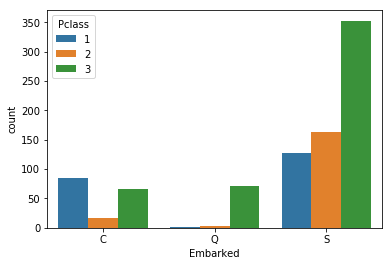

In [139]:
sns.countplot(x='Embarked',data=df,hue='Pclass',order=['C','Q','S'])

C = Cherbourg, Q = Queenstown, S = Southampton
1st class passengers embarked on C and S, 
2nd class passengers embarked mostly on S,
3rd class passengers embarked on C,Q but mostly S.

# Find Factors that had an effect on survival

In [144]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

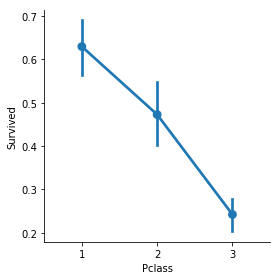

In [141]:
sns.factorplot('Pclass','Survived',data=df)

This is very clear that passengers of higher classes had much higher chance of survival

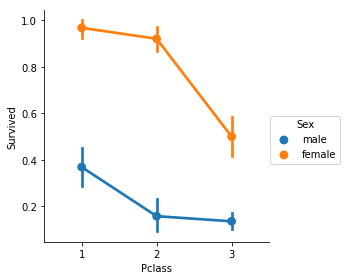

In [143]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)

Wow! this is surprising, women had far better chance of survival than men! 

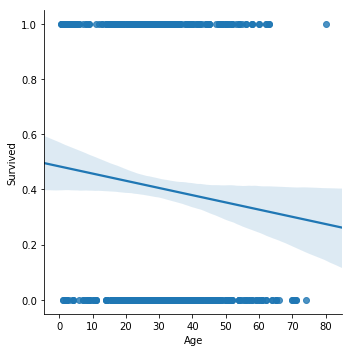

In [145]:
sns.lmplot('Age','Survived',data=df)

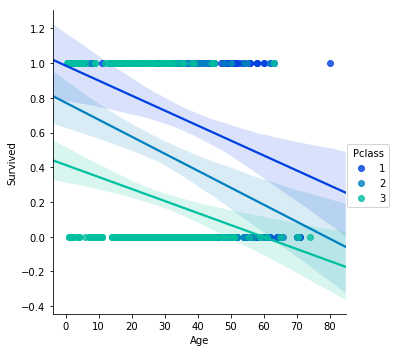

In [146]:
sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='winter')

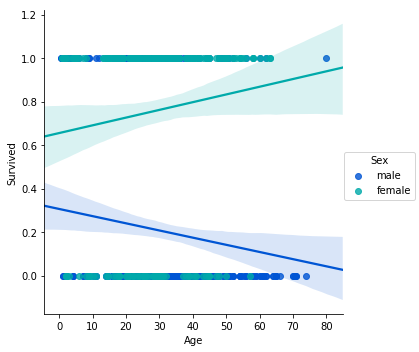

In [147]:
sns.lmplot('Age','Survived',hue='Sex',data=df,palette='winter')

males: their survival chances decreased with age, 
females: their survival chances increased with age.

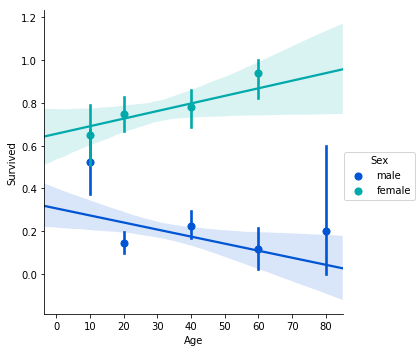

In [150]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Sex',data=df,palette='winter',x_bins=generations)

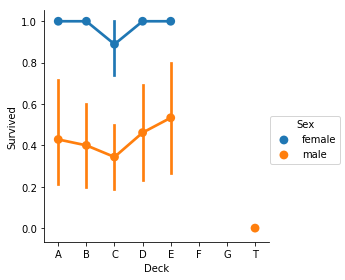

In [154]:
sns.factorplot('Deck','Survived',hue='Sex',data=p1_df,order=['A','B','C','D','E','F','G','T'])

I am looking only at 1st class because only for these passengers I have information about the deck.
looks like deck C has a lower chance of survival than other decks (for men and women)
decks D and E have higher survival rates for men.

In [159]:
df['Alone']=(df.Parch==0)&(df.SibSp==0)

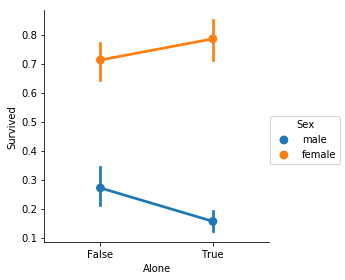

In [160]:
sns.factorplot('Alone','Survived',hue='Sex',data=df)

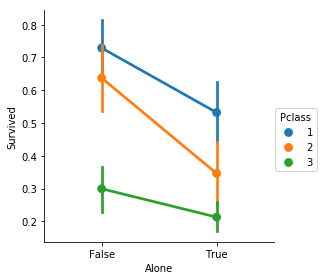

In [161]:
sns.factorplot('Alone','Survived',hue='Pclass',data=df)

Females had higher survival chances if they were alone, while males had lower chances. 